In [3]:
import pandas as pd
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import re
import tensorflow as tf
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix,classification_report
# from gensim.models import Word2Vec

In [4]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mrtat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mrtat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': BernoulliNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

In [6]:
df=pd.read_csv(r"C:\Users\mrtat\Downloads\NTI\Data\spam.csv",
               encoding="ISO-8859-1")

In [7]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(403)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df["text"]=df["v2"]
df["target"]=df["v1"]
df.drop(columns=["v1","v2","Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [12]:
lb = LabelEncoder()
df["target"] = lb.fit_transform(df["target"])

<Axes: xlabel='target', ylabel='count'>

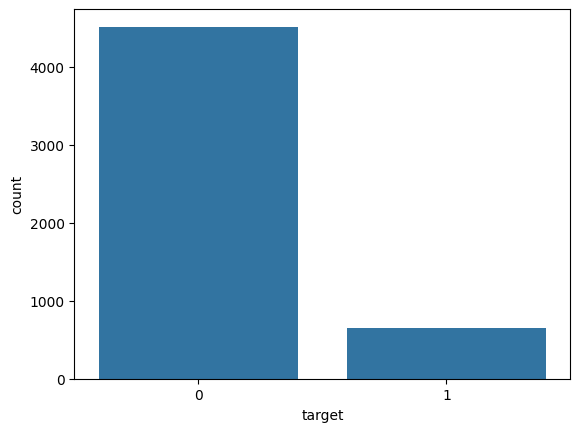

In [13]:
sns.countplot(data=df, x='target')

In [14]:
X=df["text"]
y=df["target"]

In [15]:
print(y.value_counts())
print(y.value_counts(normalize=True))  # Shows percentages

target
0    4516
1     653
Name: count, dtype: int64
target
0    0.87367
1    0.12633
Name: proportion, dtype: float64


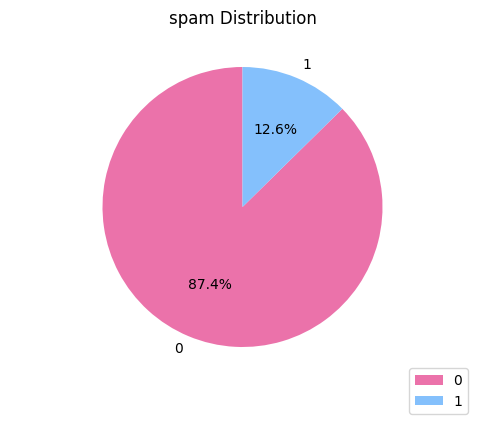

In [16]:
e_counts = df['target'].value_counts()
e_counts.plot(
    kind='pie',
    figsize=(6, 4),
    autopct='%1.1f%%',   # add in percentages
    startangle=90,       # start angle 90°   
    colors=["#eb72aa","#84c0fc"],  # Custom colors for the pie chart    
)

plt.title('spam Distribution\n')
plt.axis('equal')  # Sets the pie chart to look like a circle.
plt.legend(labels=y.index, bbox_to_anchor=(1, 0))
plt.ylabel('')  # Hide y-label
plt.show()

In [17]:
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|@\S+|#\S+|[^a-z\s]", '', text)  # remove links, mentions, hashtags, punctuation
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(words)

# Apply to data
df['clean_text'] = df['text'].apply(clean_text)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [20]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
# Resampling the data to balance the classes

print(y_train.value_counts())
print(y_train.value_counts(normalize=True))  # Shows percentages

target
0    3627
1    3627
Name: count, dtype: int64
target
0    0.5
1    0.5
Name: proportion, dtype: float64


In [21]:
results = {}

# Assuming you have X_train and y_train already defined
for name, model in models.items():
    # First fit the model
    model.fit(X_train, y_train)

    # Then predict
    y_pred = model.predict(X_test)

    # Save evaluation metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, zero_division=0)
    }


In [22]:
metrics_df = pd.DataFrame(results).T
metrics_df.index.name = 'Model'
print("\nPerformance Metrics:\n", metrics_df)


Performance Metrics:
                      Accuracy  Precision    Recall  F1-Score
Model                                                       
Logistic Regression  0.983559   0.932432  0.951724  0.941980
Naive Bayes          0.980658   1.000000  0.862069  0.925926
KNN                  0.948743   1.000000  0.634483  0.776371
Decision Tree        0.959381   0.845638  0.868966  0.857143
Random Forest        0.979691   1.000000  0.855172  0.921933
AdaBoost             0.925532   0.712500  0.786207  0.747541
SVM                  0.983559   0.992308  0.889655  0.938182


In [23]:
best_model_name = metrics_df['F1-Score'].idxmax()
best_model = models[best_model_name]
print(f"\nBest Model based on F1-Score: {best_model_name}\n")


Best Model based on F1-Score: Logistic Regression



In [24]:
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

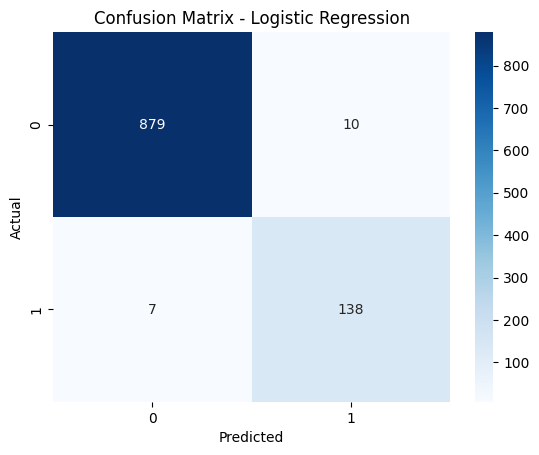

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       889
           1       0.93      0.95      0.94       145

    accuracy                           0.98      1034
   macro avg       0.96      0.97      0.97      1034
weighted avg       0.98      0.98      0.98      1034



In [25]:
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_best))